In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def basic_convolution_edge_detection(image_path):
    
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Image not found.")
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)
    
    kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
    
    ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)
    
    grad_x = cv2.filter2D(blurred, cv2.CV_32F, kx)
    grad_y = cv2.filter2D(blurred, cv2.CV_32F, ky)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    
    _, binary_edge_map = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)
   
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_edge_map, cmap='gray')
    plt.title("Binary Edge Map (Convolution)")
    plt.axis('off')

    plt.show()

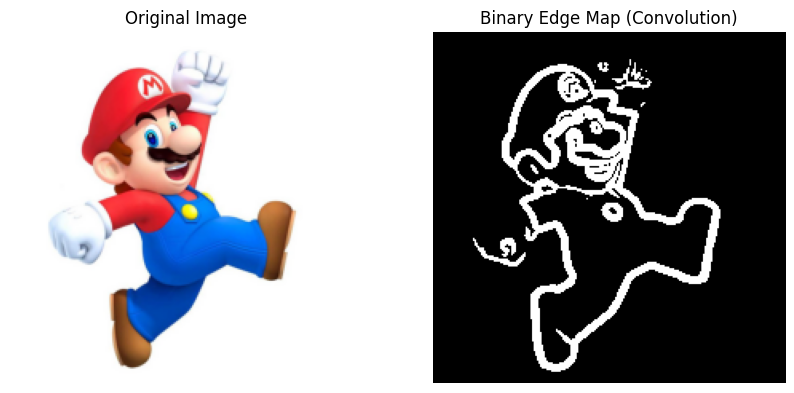

In [26]:
basic_convolution_edge_detection(r'C:\Users\Kapil Paroda\Downloads\Screenshot 2025-12-13 175936.png')